In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
import pandas.util.testing as tm
%matplotlib inline

C:\Users\ansdu\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


In [2]:
# Windows 한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
case = pd.read_csv("./data/Case.csv")
patient_info = pd.read_csv("./data/PatientInfo.csv")
policy = pd.read_csv("./data/Policy.csv")
region = pd.read_csv("./data/Region.csv")
search_trend = pd.read_csv("./data/SearchTrend.csv")
seoul_floating = pd.read_csv("./data/SeoulFloating.csv")
time = pd.read_csv("./data/Time.csv")
time_age = pd.read_csv("./data/TimeAge.csv")
time_gender = pd.read_csv("./data/TimeGender.csv")
time_province = pd.read_csv("./data/TimeProvince.csv")
weather = pd.read_csv("./data/Weather.csv")

## 사회적 거리두기 시행 이후 test 대비 확진자 수

In [5]:
time = time[['date', 'time', 'test', 'negative', 'confirmed']]
time.head()

,date,time,test,negative,confirmed
0,2020-01-20,16,1,0,1
1,2020-01-21,16,1,0,1
2,2020-01-22,16,4,3,1
3,2020-01-23,16,22,21,1
4,2020-01-24,16,27,25,2


In [6]:
# test 대비 확진자 수
print(time.count())
print(len(time['date'].unique())) # => row에 중복되는 날짜가 없음을 알 수 있다.

test_divide = time[['date', 'test', 'negative', 'confirmed']]
test_divide['confirmed/test (단위 %)']  = round((test_divide['confirmed'] / test_divide['test']) * 100, 1)
test_divide['negative/test (단위 %)']  = round((test_divide['negative'] / test_divide['test']) * 100, 1)

# test 진행 횟수가 적으면 조금만 증가하여도 %가 많이 차이나기 때문에 test 횟수가 100이상인 데이터만 확인함.
test_divide = test_divide[test_divide['test'] >= 100]
test_divide

date         163
time         163
test         163
negative     163
confirmed    163
dtype: int64
163


,date,test,negative,confirmed,confirmed/test (단위 %),negative/test (단위 %)
8,2020-01-28,116,97,4,3.4,83.6
9,2020-01-29,187,155,4,2.1,82.9
10,2020-01-30,246,199,6,2.4,80.9
11,2020-01-31,312,245,11,3.5,78.5
12,2020-02-01,371,289,12,3.2,77.9
...,...,...,...,...,...,...
158,2020-06-26,1232315,1200885,12602,1.0,97.4
159,2020-06-27,1243780,1211261,12653,1.0,97.4
160,2020-06-28,1251695,1219975,12715,1.0,97.5
161,2020-06-29,1259954,1228698,12757,1.0,97.5


In [7]:
_0229 = test_divide[test_divide['date'] <= '2020-02-29']
_0229_0419 = test_divide[('2020-02-29' <= test_divide['date']) & (test_divide['date'] <= '2020-04-19')]
_0419_ = test_divide['2020-04-19' <= test_divide['date']]
_0229

,date,test,negative,confirmed,confirmed/test (단위 %),negative/test (단위 %)
8,2020-01-28,116,97,4,3.4,83.6
9,2020-01-29,187,155,4,2.1,82.9
10,2020-01-30,246,199,6,2.4,80.9
11,2020-01-31,312,245,11,3.5,78.5
12,2020-02-01,371,289,12,3.2,77.9
13,2020-02-02,429,327,15,3.5,76.2
14,2020-02-03,490,414,15,3.1,84.5
15,2020-02-04,607,462,16,2.6,76.1
16,2020-02-05,714,522,18,2.5,73.1
17,2020-02-06,885,693,23,2.6,78.3


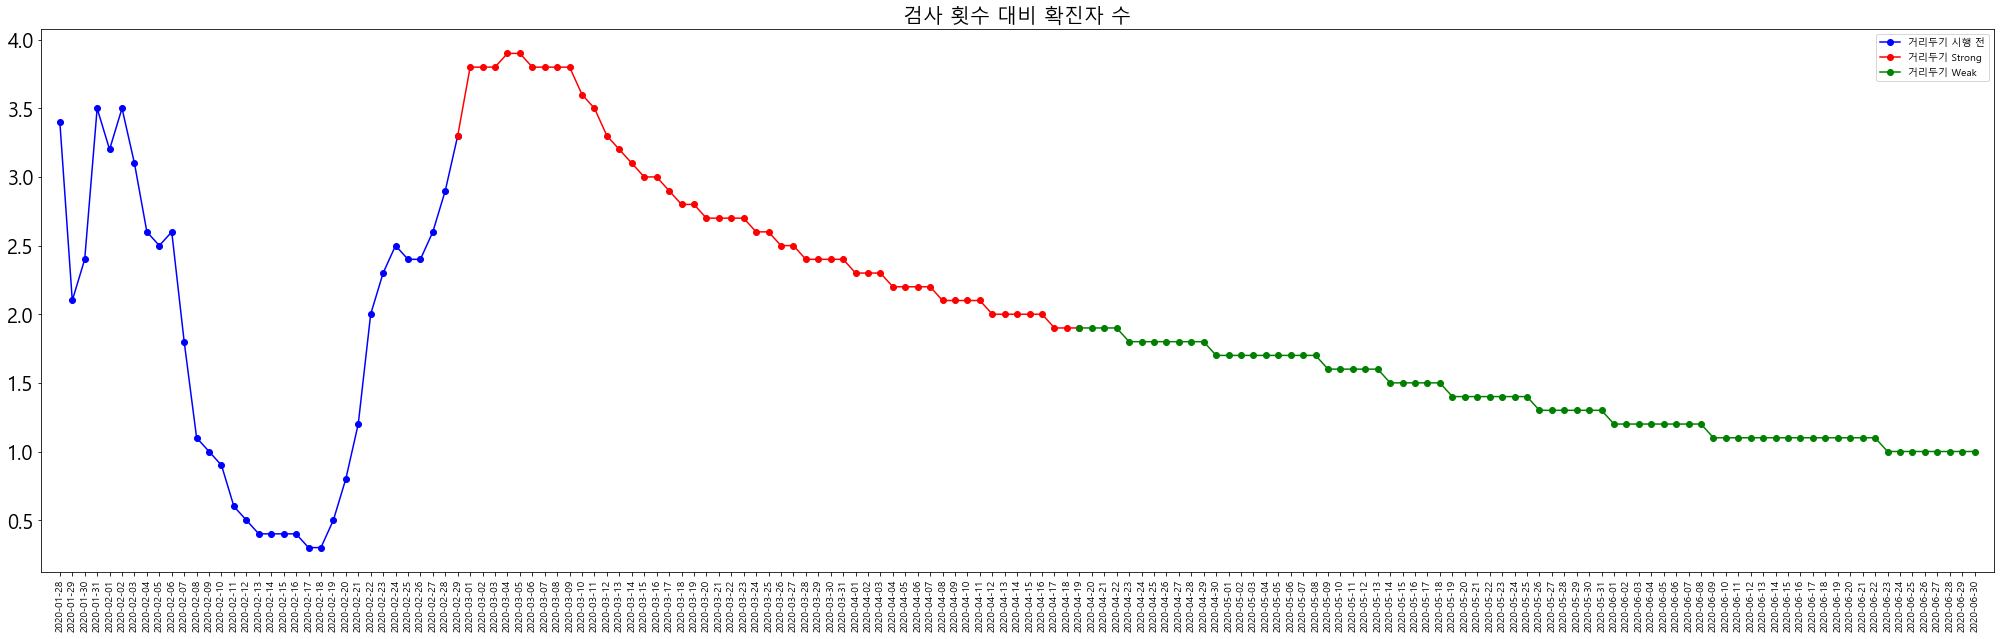

In [8]:
fig, ax = plt.subplots(figsize=(35,10))
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=20)
plt.margins(x=0.01)
plt.title("검사 횟수 대비 확진자 수", fontsize=20)

ax.plot(_0229['date'], _0229[['confirmed/test (단위 %)']], marker='o', c='b', label='거리두기 시행 전')
ax.plot(_0229_0419['date'], _0229_0419[['confirmed/test (단위 %)']], marker='o', c='r', label='거리두기 Strong')
ax.plot(_0419_['date'], _0419_[['confirmed/test (단위 %)']], marker='o', c='g', label='거리두기 Weak')

plt.legend()
plt.show()

In [9]:
# 그래프를 해석하기 위해 날짜별로 infection_case를 group하여 출력하였다.
time_patient = pd.merge(test_divide, patient_info, left_on='date', right_on='confirmed_date')[['date', 'test', 'negative', 'confirmed', 'infection_case']]
time_patient = time_patient.groupby(['date', 'infection_case']).max()  # -> ['test', 'negative', 'confirmed'] columns가 누적 횟수이기 때문에 같은 그룹 중 가장 큰 값을 표시하도록 함.
time_patient.loc[:'2020-02-17']

test  negative  confirmed
date       infection_case                                 
2020-01-30 contact with patient   246       199          6
           overseas inflow        246       199          6
2020-01-31 contact with patient   312       245         11
2020-02-01 contact with patient   371       289         12
2020-02-02 contact with patient   429       327         15
           overseas inflow        429       327         15
2020-02-03 overseas inflow        490       414         15
2020-02-05 contact with patient   714       522         18
           overseas inflow        714       522         18
2020-02-06 contact with patient   885       693         23
           overseas inflow        885       693         23
2020-02-07 overseas inflow       1352      1001         24
2020-02-09 contact with patient  2598      1683         27
           overseas inflow       2598      1683         27
2020-02-10 contact with patient  3110      2552         27
2020-02-16 contact with patient  8161      7647         29

In [10]:
time_patient.loc['2020-02-18':'2020-02-29']

test  negative  confirmed
date       infection_case                                           
2020-02-18 Shincheonji Church              9772      8923         31
           contact with patient            9772      8923         31
           etc                             9772      8923         31
2020-02-19 Cheongdo Daenam Hospital       11173      9973         51
           Seongdong-gu APT               11173      9973         51
           Shincheonji Church             11173      9973         51
           contact with patient           11173      9973         51
           etc                            11173      9973         51
2020-02-20 Cheongdo Daenam Hospital       13202     11238        104
           Seongdong-gu APT               13202     11238        104
           Shincheonji Church             13202     11238        104
           contact with patient           13202     11238        104
           etc                            13202     11238        104
2020-02-21 Cheongdo Daenam Hospital       16400     13016        204
           Eunpyeong St. Mary's Hospital  16400     13016        204
           Onchun Church                  16400     13016        204
           Pilgrimage to Israel           16400     13016        204
           Shincheonji Church             16400     13016        204
           contact with patient           16400     13016        204
           etc                            16400     13016        204
2020-02-22 Cheongdo Daenam Hospital       21586     15116        433
           Eunpyeong St. Mary's Hospital  21586     15116        433
           Onchun Church                  21586     15116        433
           Shincheonji Church             21586     15116        433
           contact with patient           21586     15116        433
           etc                            21586     15116        433
           overseas inflow                21586     15116        433
2020-02-23 Cheongdo Daenam Hospital       26179     17520        602
           Eunpyeong St. Mary's Hospital  26179     17520        602
           Onchun Church                  26179     17520        602
           Shincheonji Church             26179     17520        602
           contact with patient           26179     17520        602
           etc                            26179     17520        602
           overseas inflow                26179     17520        602
2020-02-24 Milal Shelter                  32756     20292        833
           Onchun Church                  32756     20292        833
           Pilgrimage to Israel           32756     20292        833
           Shincheonji Church             32756     20292        833
           contact with patient           32756     20292        833
           etc                            32756     20292        833
2020-02-25 Cheongdo Daenam Hospital       40304     25447        977
           Eunpyeong St. Mary's Hospital  40304     25447        977
           Milal Shelter                  40304     25447        977
           Onchun Church                  40304     25447        977
           Seongdong-gu APT               40304     25447        977
           Shincheonji Church             40304     25447        977
           contact with patient           40304     25447        977
           etc                            40304     25447        977
           gym facility in Cheonan        40304     25447        977
           overseas inflow                40304     25447        977
2020-02-26 Cheongdo Daenam Hospital       53553     31576       1261
           Eunpyeong St. Mary's Hospital  53553     31576       1261
           Onchun Church                  53553     31576       1261
           Shincheonji Church             53553     31576       1261
           contact with patient           53553     31576       1261
           etc                            53553     31576       1261
           gym facility in Cheonan       

In [11]:
time_patient.loc['2020-02-29':'2020-03-09']

test  negative  confirmed
date       infection_case                                                    
2020-02-29 Shincheonji Church                      94055     55723       3150
           Suyeong-gu Kindergarten                 94055     55723       3150
           contact with patient                    94055     55723       3150
           etc                                     94055     55723       3150
           gym facility in Cheonan                 94055     55723       3150
           overseas inflow                         94055     55723       3150
2020-03-01 Gyeongsan Seorin Nursing Home           98921     61825       3736
           Seongdong-gu APT                        98921     61825       3736
           Shincheonji Church                      98921     61825       3736
           contact with patient                    98921     61825       3736
           etc                                     98921     61825       3736
           gym facility in Cheonan                 98921     61825       3736
           overseas inflow                         98921     61825       3736
2020-03-02 Gyeongsan Seorin Nursing Home          109591     71580       4212
           Onchun Church                          109591     71580       4212
           Seongdong-gu APT                       109591     71580       4212
           Shincheonji Church                     109591     71580       4212
           contact with patient                   109591     71580       4212
           etc                                    109591     71580       4212
2020-03-03 Milal Shelter                          125851     85484       4812
           Shincheonji Church                     125851     85484       4812
           contact with patient                   125851     85484       4812
           etc                                    125851     85484       4812
2020-03-04 Bonghwa Pureun Nursing Home            136707    102965       5328
           Changnyeong Coin Karaoke               136707    102965       5328
           Dongan Church                          136707    102965       5328
           Seongdong-gu APT                       136707    102965       5328
           Shincheonji Church                     136707    102965       5328
           contact with patient                   136707    102965       5328
           etc                                    136707    102965       5328
           overseas inflow                        136707    102965       5328
2020-03-05 Bonghwa Pureun Nursing Home            146541    118965       5766
           Changnyeong Coin Karaoke               146541    118965       5766
           Gyeongsan Cham Joeun Community Center  146541    118965       5766
           Gyeongsan Jeil Silver Town             146541    118965       5766
           Shincheonji Church                     146541    118965       5766
           contact with patient                   146541    118965       5766
           etc                                    146541    118965       5766
2020-03-06 Dongan Church                          164740    136624       6284
           Gyeongsan Cham Joeun Community Center  164740    136624       6284
           Gyeongsan Jeil Silver Town             164740    136624       6284
           contact with patient                   164740    136624       6284
           etc                                    164740    136624       6284
           gym facility in Cheonan                164740    136624       6284
2020-03-07 Gyeongsan Cham Joeun Community Center  178189    151802       6767
           Gyeongsan Jeil Silver Town             178189    151802       6767
           Onchun Church                          178189    151802       6767
           contact with patient                   178189    151802       6767
           etc                                    178189    151802       6767
           gym facility in Sejong                 178189    151802       6

#### 그래프 해석
- 초기의 감염원인은 대부분 해외 유입으로 인한 감염과 그 확진자와 접촉한 사람들이 확진되는 경우이었다.
- test 대비 확진자 수가 증가하기 시작한 것은 신천지 집단 감염이 시작되는 2/18부터 이다.
- 이후 신천지 뿐만 아니라 여러 곳에서 집단 감염이 시작되었고, 이로 인해 확진자 수가 계속 증가하였다.
- 2/29부터 사회적 거리두기가 시작되었고(빨강), 이전 집단 감염으로 인한 확진자 수가 증가하다가 확진자 수가 줄어드는 추세를 확인할 수 있다.